# Chat ou Chien !! une méthode d'apprentissage automatique.

Dans une entreprise de marketing, on veut faire une étude sur les clients qui fréquentent un grand magasin. L'idée est d'estimer le pourcentage de clients qui ont des chats et ceux qui ont des chiens, afin de prendre des décisions marketing ciblées. Vous proposez d'utiliser une caméra pour détecter et compter les deux animaux dans le magasin. La première étape du projet est de développer un modèle qui peut détecter le chat ou le chien. Ainsi, dans ce brief, en utilisant une base de données, vous allez entrainer un modèle d'apprentissage automatique avec un apprentissage supervisé.

# Veille technologique: Opencv python

- Préparation données imagerie pour méthode classique d'apprentissage automatique
- Entrainement et évaluation (similaire aux briefs précédents)

## Operations Simples

In [4]:
# use opencv to load and display the image
import os
import cv2
from imageio import imread, imsave
import numpy as np

In [5]:
# Préparer les données
size = (150, 150)
image_directory = 'catsanddogs/PetImages/'
images = []  # liste pour les images
label = []  # liste pour les labels (0 ou 1) pour deux classes

# Créer les répertoires de sortie s'ils n'existent pas
os.makedirs('catsanddogs/ResizedImages/Cat/', exist_ok=True)
os.makedirs('catsanddogs/ResizedImages/Dog/', exist_ok=True)

# Lire les noms des images dans chaque sous-dossier
cat_images = os.listdir(image_directory + 'Cat/')
dog_images = os.listdir(image_directory + 'Dog/')

# Boucle pour les images de chats
for img_name in cat_images:
    img_path = image_directory + 'Cat/' + img_name
    try:
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Image corrompue ou inexistante: {img_path}")
        img_resized = cv2.resize(img, size)
        # Construire le nouveau chemin avec l'extension correcte
        save_path = f'catsanddogs/ResizedImages/Cat/{img_name}'
        cv2.imwrite(save_path, img_resized)
        images.append(img_resized)
        label.append(0)
    except Exception as e:
        print(f"Erreur: {e}")

# Boucle pour les images de chiens
for img_name in dog_images:
    img_path = image_directory + 'Dog/' + img_name
    try:
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Image corrompue ou inexistante: {img_path}")
        img_resized = cv2.resize(img, size)
        # Construire le nouveau chemin avec l'extension correcte
        save_path = f'catsanddogs/ResizedImages/Dog/{img_name}'
        cv2.imwrite(save_path, img_resized)
        images.append(img_resized)
        label.append(1)
    except Exception as e:
        print(f"Erreur: {e}")

# Enregistrer les labels en tant que tableau NumPy
np.save('catsanddogs/ResizedImages/Label.npy', label)

# Afficher la forme
print("Forme des images: ", np.array(images).shape)
print("Forme des labels: ", np.array(label).shape)

Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/10125.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/10404.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/10501.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/10820.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/11210.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/11565.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/11874.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/11935.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/140.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/2663.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/3300.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/3491.jpg
Erreur: Image corrompue ou inexistante: catsanddogs/PetImages/Cat/4833.jpg
Erreur: Image corr

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Convertir `images` en un tableau numpy si ce n'est pas déjà fait
images_np = np.array(images)

# Redimensionner les données images pour le modèle d'apprentissage automatique
images_reshaped = images_np.reshape(images_np.shape[0], -1)

# Split les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, label, test_size=0.2, stratify=label, random_state=42)

In [7]:
# initialiser le classifier
clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# entrainer le classifier
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [8]:
from sklearn.metrics import classification_report

# Prédire les labels pour l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle en utilisant classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      2496
           1       0.68      0.63      0.65      2494

    accuracy                           0.66      4990
   macro avg       0.66      0.66      0.66      4990
weighted avg       0.66      0.66      0.66      4990



### Essayer de normaliser chaque image entre 0 et 255 et rentrainer le modèle. Y a-t-il une amélioration ?

In [9]:
# Normaliser les données d'image pour qu'elles soient comprises entre 0 et 1
images_normalized = images_np / 255.0

# Redimensionner les données images pour le modèle d'apprentissage automatique
images_reshaped = images_normalized.reshape(images_normalized.shape[0], -1)

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, label, test_size=0.2, stratify=label, random_state=42)

# Réinitialiser et entraîner le RandomForestClassifier avec les données normalisées
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# Prédire les labels pour l'ensemble de test normalisé
y_pred = clf.predict(X_test)

# Évaluer le modèle avec les données normalisées
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.70      0.68      2496
           1       0.68      0.63      0.65      2494

    accuracy                           0.66      4990
   macro avg       0.67      0.66      0.66      4990
weighted avg       0.67      0.66      0.66      4990



### Normaliser une image avec un histogramme

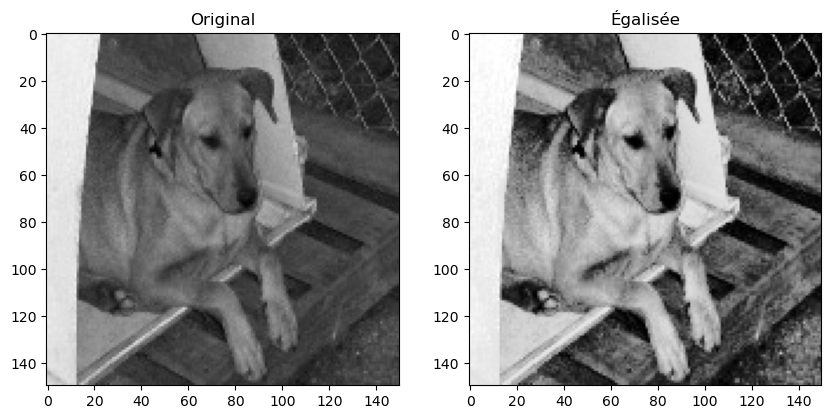

In [10]:
from matplotlib import pyplot as plt

# Chargement de l'image en niveaux de gris
image = cv2.imread('C:/Users/GRETA/Desktop/Exercice/NLP_DL/CNN/catsanddogs/ResizedImages/Dog/100.jpg', cv2.IMREAD_GRAYSCALE)

# Égalisation de l'histogramme de l'image
image_eq = cv2.equalizeHist(image)

# Configuration de matplotlib pour afficher l'image originale
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

# Configuration de matplotlib pour afficher l'image après égalisation d'histogramme
plt.subplot(1, 2, 2)
plt.imshow(image_eq, cmap='gray')
plt.title('Égalisée')

plt.show()

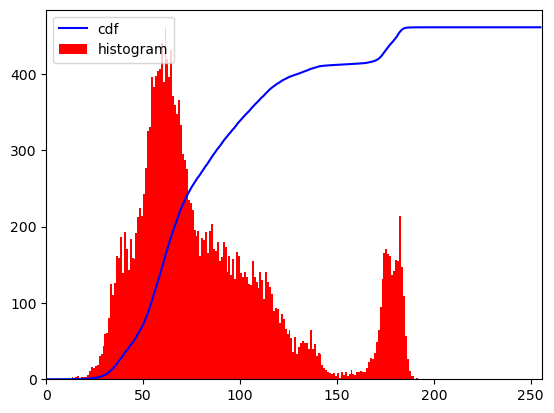

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('C:/Users/GRETA/Desktop/Exercice/NLP_DL/CNN/catsanddogs/ResizedImages/Dog/100.jpg',0)
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Neural networ MLP

Entrainer un modèle MLP pour detecter la class Dog ou Cat.

In [15]:
# use PCA to reduce dimensions
# check this tuto: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Spécification de la couche d'entrée
input_layer = Input(shape=(150, 150, 3))

# Premier couche cachée
x = Flatten()(input_layer)  # Aplatir l'entrée pour la connecter aux couches denses
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)  # Ajout d'un dropout pour régulariser

# Deuxième couche cachée
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)  # Ajout d'un dropout pour régulariser

# Couche de sortie
output_layer = Dense(1, activation='sigmoid')(x)

# Création du modèle
model = Model(inputs=input_layer, outputs=output_layer)

# Compilation du modèle
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8640128   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129 

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Convertir la liste de label en tableau numpy
y_train = np.array(y_train)

# Redimensionnement de X_train pour correspondre à l'entrée attendue par le modèle
X_train = X_train.reshape(-1, 150, 150, 3)

early_stopping = EarlyStopping(monitor='val_loss',  # Métrique à surveiller
                               patience=10,  # Nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté
                               verbose=1,  # Afficher des messages
                               restore_best_weights=True)

# entrainer le modèle avec validation_split = 2, epochs = 20, et un batch_size = 128
MLP_model = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128,
                    callbacks=[early_stopping])

Epoch 1/20
125/125 [==============================] - 48s 357ms/step - loss: 1.4663 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 2/20
125/125 [==============================] - 15s 122ms/step - loss: 0.6932 - accuracy: 0.4904 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 3/20
125/125 [==============================] - 14s 112ms/step - loss: 0.6931 - accuracy: 0.5013 - val_loss: 0.6928 - val_accuracy: 0.4945
Epoch 4/20
125/125 [==============================] - 14s 110ms/step - loss: 0.6929 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4945
Epoch 5/20
125/125 [==============================] - 15s 119ms/step - loss: 0.6931 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 6/20
125/125 [==============================] - 17s 136ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch 7/20
125/125 [==============================] - 15s 118ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6932 - val_ac

In [17]:
# Redimensionner X_test pour correspondre à l'entrée attendue par le modèle Keras
X_test_reshaped = X_test.reshape(-1, 150, 150, 3)

# Utilisez le modèle pour prédire les classes sur les données de test
predictions_prob = model.predict(X_test_reshaped)
predictions = (predictions_prob > 0.5).astype(int)

# Évaluation à l'aide de classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

156/156 [==============================] - 3s 19ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2496
           1       0.00      0.00      0.00      2494

    accuracy                           0.50      4990
   macro avg       0.25      0.50      0.33      4990
weighted avg       0.25      0.50      0.33      4990



c:\Users\GRETA\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GRETA\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GRETA\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
